In [1]:
import pandas as pd
import numpy as  np

#preprocessamento
from sklearn import preprocessing

#imagens
from IPython.display import Image as img

#Treinamento de Dados
from sklearn.model_selection import train_test_split


#bibliotecas Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Importando Arquivo XLSX

In [2]:
df_cesaria = pd.read_excel ('cesarianadataset.xlsx')

In [3]:
df_cesaria.head()

,idade,nr_parto,tempo_parto,pressao_sangue,prblm_coracao,Cesariana
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


Text(0.5, 0.98, 'Distribuição da Idade')

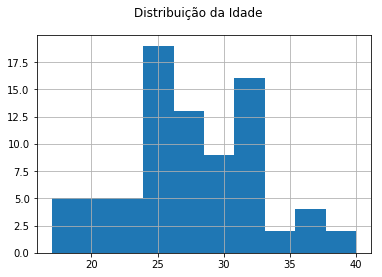

In [4]:
df_cesaria.idade.hist()
plt.suptitle('Distribuição da Idade')

In [5]:
df_cesaria.describe()

,idade,nr_parto,tempo_parto,pressao_sangue,prblm_coracao,Cesariana
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,27.687500,1.662500,0.637500,1.000000,0.375000,0.575000
std,5.017927,0.794662,0.815107,0.711568,0.487177,0.497462
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,0.000000,0.750000,0.000000,0.000000
50%,27.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,32.000000,2.000000,1.000000,1.250000,1.000000,1.000000
max,40.000000,4.000000,2.000000,2.000000,1.000000,1.000000


Agrupamento por Idades

In [6]:
df_cesaria.idade.value_counts()

26    10
32     8
27     7
25     7
29     6
28     6
33     5
22     4
31     3
36     3
20     3
30     3
21     2
35     2
19     2
18     2
24     2
40     1
23     1
38     1
37     1
17     1
Name: idade, dtype: int64

Agrupamento por Cesariana

In [7]:
df_cesaria.Cesariana.value_counts()

1    46
0    34
Name: Cesariana, dtype: int64

Pré Processamento e Transformações

In [8]:
df_cesaria.loc[df_cesaria.idade  <  18,'Faixa_idade'] = 'Adolescente'

df_cesaria.loc[(df_cesaria.idade >= 19) & (df_cesaria.idade < 22),'Faixa_idade']  = 'Jovem'

df_cesaria.loc[(df_cesaria.idade >= 22) & (df_cesaria.idade < 31),'Faixa_idade']  = 'Adulto'

df_cesaria.loc[(df_cesaria.idade >= 31) & (df_cesaria.idade < 41),'Faixa_idade']  = 'Experiente'

df_cesaria.loc[df_cesaria.idade  >= 41 ,'Faixa_idade'] = 'Senior'

In [9]:
df_cesaria.loc[df_cesaria.Cesariana  ==  0,'Clas_Cesariana'] = 'Não'

df_cesaria.loc[df_cesaria.Cesariana == 1, 'Clas_Cesariana']  = 'Sim'



In [10]:
df_cesaria.loc[df_cesaria.prblm_coracao  ==  0,'Clas_prblm_coracao'] = 'Apto'

df_cesaria.loc[df_cesaria.prblm_coracao == 1, 'Clas_prblm_coracao']  = 'Inapto'


In [11]:
df_cesaria.loc[df_cesaria.pressao_sangue  ==  0,'Clas_pressao_sangue'] = 'Baixo'

df_cesaria.loc[df_cesaria.pressao_sangue == 1, 'Clas_pressao_sangue']  = 'Normal'

df_cesaria.loc[df_cesaria.pressao_sangue == 2, 'Clas_pressao_sangue']  = 'Alto'

In [12]:
df_cesaria.loc[df_cesaria.tempo_parto  ==  0,'Clas_tempo_parto'] = 'Pontual'

df_cesaria.loc[df_cesaria.tempo_parto == 1, 'Clas_tempo_parto']  = 'Prematuro'

df_cesaria.loc[df_cesaria.tempo_parto == 2, 'Clas_tempo_parto']  = 'Tardio'

In [13]:
df_cesaria = pd.get_dummies(df_cesaria, columns = ["Clas_prblm_coracao"], prefix="Prblm")

In [14]:
df_cesaria = pd.get_dummies(df_cesaria, columns = ["Clas_pressao_sangue"], prefix="Pressao")

In [15]:
df_cesaria = pd.get_dummies(df_cesaria, columns = ["Clas_tempo_parto"], prefix="Parto")

In [16]:
df_cesaria.head()

,idade,nr_parto,tempo_parto,pressao_sangue,prblm_coracao,Cesariana,Faixa_idade,Clas_Cesariana,Prblm_Apto,Prblm_Inapto,Pressao_Alto,Pressao_Baixo,Pressao_Normal,Parto_Pontual,Parto_Prematuro,Parto_Tardio
0,22,1,0,2,0,0,Adulto,Não,1,0,1,0,0,1,0,0
1,26,2,0,1,0,1,Adulto,Sim,1,0,0,0,1,1,0,0
2,26,2,1,1,0,0,Adulto,Não,1,0,0,0,1,0,1,0
3,28,1,0,2,0,0,Adulto,Não,1,0,1,0,0,1,0,0
4,22,2,0,1,0,1,Adulto,Sim,1,0,0,0,1,1,0,0


Matriz de Correlação e Visaulização dos Dados

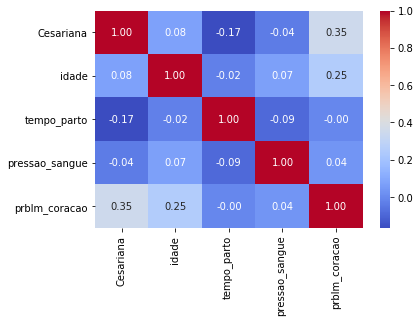

In [17]:
g = sns.heatmap(df_cesaria[["Cesariana","idade","tempo_parto","pressao_sangue","prblm_coracao"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

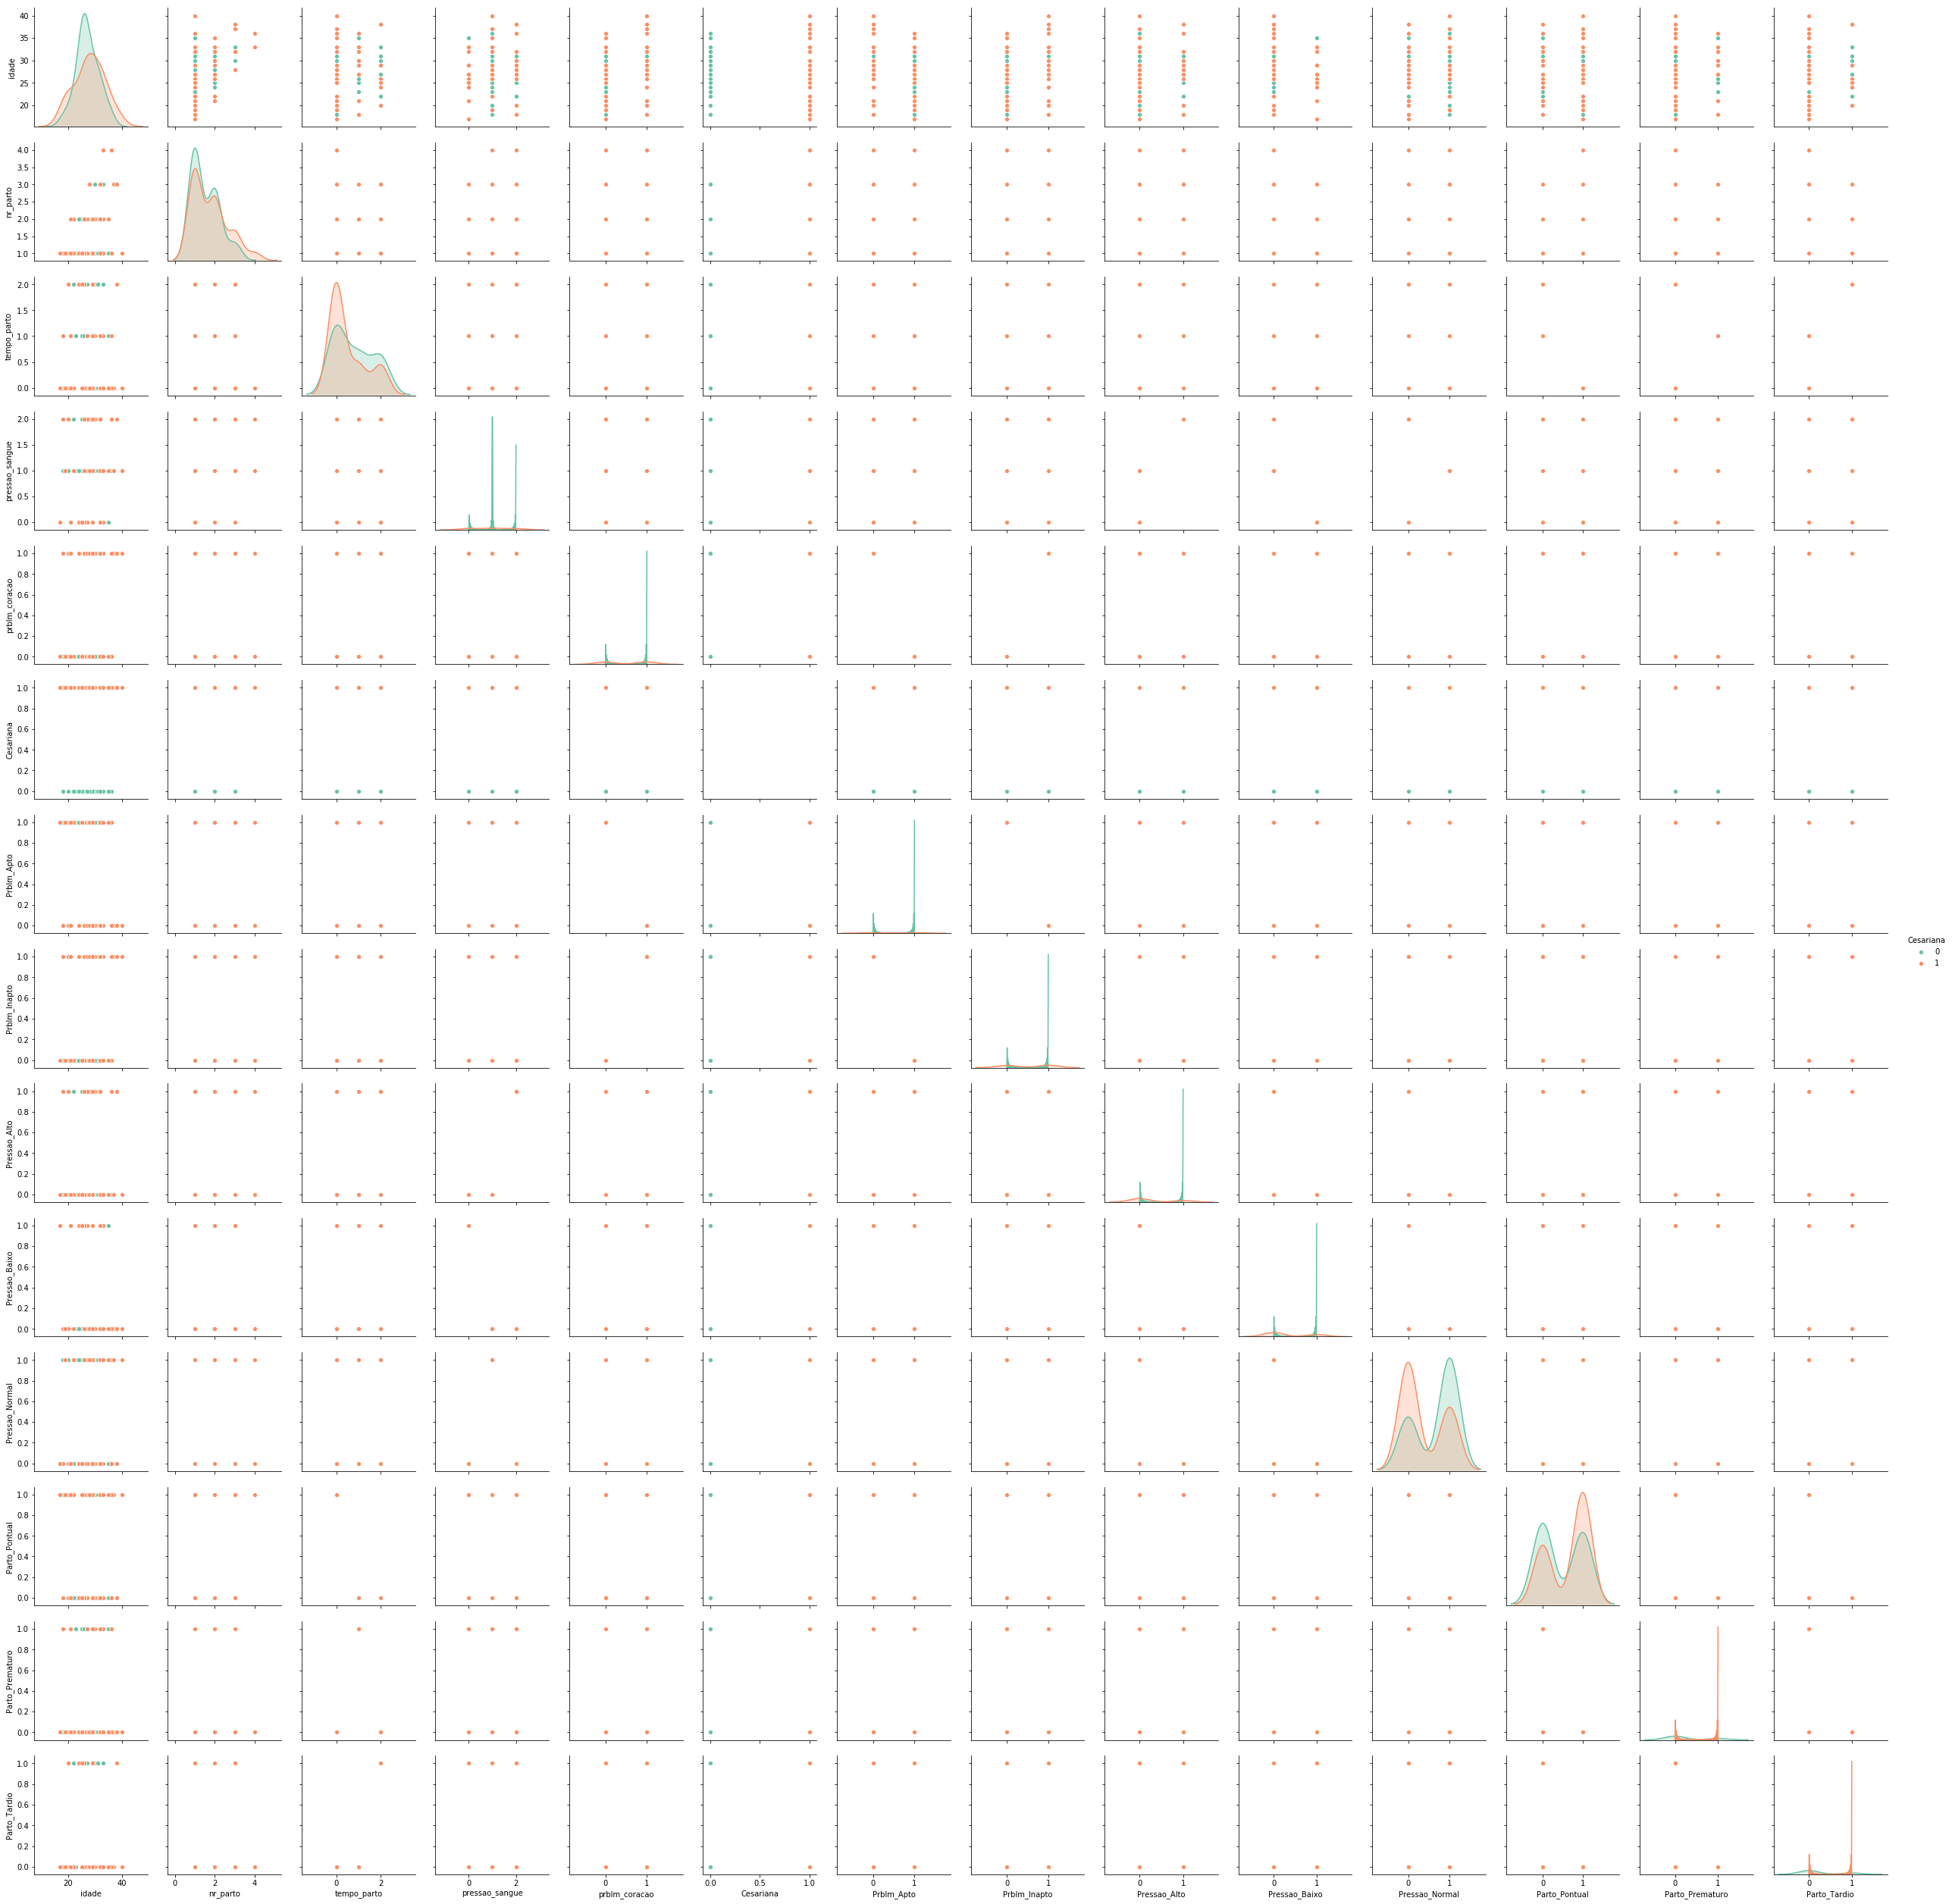

In [18]:
sns.pairplot(df_cesaria,hue="Cesariana",palette="Set2")
plt.show()

Normalização do Atributo Idade Mim-Max

In [20]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

# fit and transform in one step
df_cesaria['Norm_idade'] = scaler.fit_transform(df_cesaria[['idade']])


df_cesaria.head()

,idade,nr_parto,tempo_parto,pressao_sangue,prblm_coracao,Cesariana,Faixa_idade,Clas_Cesariana,Prblm_Apto,Prblm_Inapto,Pressao_Alto,Pressao_Baixo,Pressao_Normal,Parto_Pontual,Parto_Prematuro,Parto_Tardio,Norm_idade
0,22,1,0,2,0,0,Adulto,Não,1,0,1,0,0,1,0,0,0.217391
1,26,2,0,1,0,1,Adulto,Sim,1,0,0,0,1,1,0,0,0.391304
2,26,2,1,1,0,0,Adulto,Não,1,0,0,0,1,0,1,0,0.391304
3,28,1,0,2,0,0,Adulto,Não,1,0,1,0,0,1,0,0,0.478261
4,22,2,0,1,0,1,Adulto,Sim,1,0,0,0,1,1,0,0,0.217391


In [21]:
print(df_cesaria.Norm_idade.min())
print(df_cesaria.Norm_idade.max())

0.0
1.0


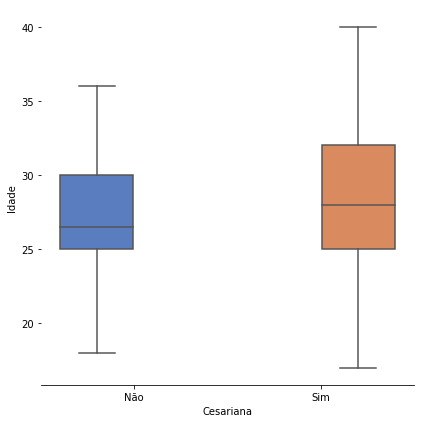

In [22]:
g = sns.factorplot(x="Clas_Cesariana",y="idade", hue ='Clas_Cesariana',data=df_cesaria,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Idade")
g = g.set_xlabels("Cesariana")

In [23]:
y_train = df_cesaria['Clas_Cesariana'].values
x_train = df_cesaria.drop('Clas_Cesariana', axis=1).values

y_test = df_cesaria['Clas_Cesariana'].values
x_test = df_cesaria.drop('Clas_Cesariana', axis=1).values

In [29]:
neighbors = np.arange(1, 9)
train.accuracy = np.empty(len(neighbors))
test.accuracy = np.empty(len(neighbors))


for i, k in enumerate(neighbors):
    Knn = KNeighborsClassifier(n_neighbors_K)
    Knn.fit(x_train, y_train)
    

train.accuracy[i] = Knn.score(x_train, y_train)

test.accuracy[i] = Knn.score(x_test, y_test)


NameError: name 'train' is not defined